In [1]:
#install.packages("vctrs", repos='http://cran.us.r-project.org')
#update.packages(oldPkgs = "vctrs", repos='https://cran.r-project.org', version='0.5.0')

In [2]:
#rm(list=ls())
#packageVersion("vctrs") # ‘1.1.0.9000’

#devtools::install_github("r-lib/rlang")
library(ggplot2)
library(ggridges)
library(coin)

Loading required package: survival



In [3]:
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/bqtls_pu1_preds/snp_scores.tsv"
#dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_100M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_5M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_25M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_50M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_100M/bqtls_pu1_preds/snp_scores.tsv"
#atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/subsampling/GM12878_250M/bqtls_pu1_preds/snp_scores.tsv"
atac_preds="/mnt/lab_data2/anusri/variant-scorer/src/output/bqtls_lcl/pu1/DNASE/summary.mean.variant_scores_new.tsv"
data=read.table(atac_preds,header=TRUE,sep='\t')

#data=read.table(dnase_preds,header=TRUE,sep='\t')

In [4]:
data

chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,⋯,max_percentile.mean,max_percentile.mean.pval,logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,logfc_x_jsd_x_max_percentile.mean
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,18967176,A,G,chr17_18967176_A_G,0.36072015,0.36072015,4.842653e-03,0.05233303,1.295566e-02,⋯,0.9445293,0.004516248,0.34022404,0.34022403,6.829142e-04,0.049403585,1.594732e-03,0.0178458134,1.837615e-03,1.784581e-02
chr4,176935913,C,A,chr4_176935913_C_A,0.86872890,0.86872890,1.140586e-04,0.13012417,5.458831e-04,⋯,0.2509876,0.239007637,0.20650619,0.20650619,2.379761e-03,0.033812431,5.415408e-03,0.0270838242,8.270258e-04,2.708382e-02
chr1,144534083,C,T,chr1_144534083_C_T,-0.12621812,0.12621812,5.696084e-02,0.02637916,8.228943e-02,⋯,0.8046981,0.029603800,-0.10105256,0.10105256,1.353753e-02,0.020973680,1.628588e-02,0.0030719600,2.092457e-02,-3.071960e-03
chr17,19015381,T,A,chr17_19015381_T_A,-0.02481135,0.02481135,3.985362e-01,0.01397344,3.132799e-01,⋯,0.9423484,0.004687809,-0.02349135,0.02349135,9.343459e-02,0.013206053,4.286340e-02,0.0003789595,1.179851e-01,-3.789595e-04
chr1,17231724,A,G,chr1_17231724_A_G,0.01082596,0.02050241,4.767202e-01,0.01406754,3.029502e-01,⋯,0.8425447,0.023372813,0.00919552,0.01751360,1.381781e-01,0.011842597,4.945201e-02,0.0002526649,1.560031e-01,1.437470e-04
chr16,87705494,C,G,chr16_87705494_C_G,1.21941532,1.21941532,1.395480e-05,0.16264654,1.852006e-04,⋯,0.5739158,0.087596488,0.68268240,0.68268240,2.930627e-05,0.092088828,1.574010e-04,0.1118828733,2.274694e-05,1.118829e-01
chr12,16789835,C,T,chr12_16789835_C_T,-0.80221134,0.80221134,2.149626e-04,0.06380628,7.526546e-03,⋯,0.5511403,0.092408514,-0.46024962,0.46024962,2.978708e-04,0.033733664,4.570947e-03,0.0278530373,9.274380e-04,-2.785304e-02
chr6,4154143,A,G,chr6_4154143_A_G,0.54257148,0.54257148,1.239745e-03,0.05817445,9.795109e-03,⋯,0.8275734,0.027908518,0.44897021,0.44897021,2.575353e-04,0.048089911,1.768133e-03,0.0269873364,1.007609e-03,2.698734e-02
chr15,70174409,C,T,chr15_70174409_C_T,1.19313122,1.19313122,1.918936e-05,0.12878263,5.505777e-04,⋯,0.8153997,0.022282690,1.00725511,1.00725510,6.920664e-06,0.104540325,8.080003e-05,0.1299883501,1.553743e-05,1.299884e-01


In [5]:
head(data)

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,⋯,max_percentile.mean,max_percentile.mean.pval,logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,logfc_x_jsd_x_max_percentile.mean
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr17,18967176,A,G,chr17_18967176_A_G,0.36072015,0.36072015,0.0048426525,0.05233303,0.0129556601,⋯,0.9445293,0.004516248,0.34022404,0.34022403,6.829142e-04,0.04940358,0.001594732,0.0178458134,1.837615e-03,0.0178458135
2,chr4,176935913,C,A,chr4_176935913_C_A,0.86872890,0.86872890,0.0001140586,0.13012417,0.0005458831,⋯,0.2509876,0.239007637,0.20650619,0.20650619,2.379761e-03,0.03381243,0.005415408,0.0270838242,8.270258e-04,0.0270838241
3,chr1,144534083,C,T,chr1_144534083_C_T,-0.12621812,0.12621812,0.0569608392,0.02637916,0.0822894317,⋯,0.8046981,0.029603800,-0.10105256,0.10105256,1.353753e-02,0.02097368,0.016285879,0.0030719600,2.092457e-02,-0.0030719600
4,chr17,19015381,T,A,chr17_19015381_T_A,-0.02481135,0.02481135,0.3985362342,0.01397344,0.3132799379,⋯,0.9423484,0.004687809,-0.02349135,0.02349135,9.343459e-02,0.01320605,0.042863396,0.0003789595,1.179851e-01,-0.0003789595
5,chr1,17231724,A,G,chr1_17231724_A_G,0.01082596,0.02050241,0.4767201785,0.01406754,0.3029501955,⋯,0.8425447,0.023372813,0.00919552,0.01751360,1.381781e-01,0.01184260,0.049452006,0.0002526649,1.560031e-01,0.0001437470
6,chr16,87705494,C,G,chr16_87705494_C_G,1.21941532,1.21941532,0.0000139548,0.16264654,0.0001852006,⋯,0.5739158,0.087596488,0.68268240,0.68268240,2.930627e-05,0.09208883,0.000157401,0.1118828733,2.274694e-05,0.1118828724


In [6]:
snps=read.table("/mnt/lab_data/kundaje/users/anusri/QTLs/bQTLs/src/pu1.txt",header=TRUE,sep='\t')

In [7]:
snps

Chr,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue
<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr17,18967176,538,418,120,G,A,0.223048327,0.86669873,2.331853e-251
chr4,176935913,626,597,29,A,C,0.046325879,0.54394890,4.449643e-162
chr1,144534083,618,368,250,T,C,0.404530744,0.05729496,5.863065e-141
chr17,19015381,144,143,1,A,T,0.006944444,0.87284968,1.040250e-126
chr1,17231724,2477,1321,1156,G,A,0.466693581,0.25519491,9.915948e-114
chr16,87705494,115,105,10,G,C,0.086956522,0.93480151,1.195059e-111
chr12,16789835,483,75,408,T,C,0.844720497,0.35517650,4.004184e-109
chr6,4154143,361,341,20,G,A,0.055401662,0.60067982,1.485270e-108
chr15,70174409,264,226,38,T,C,0.143939394,0.77547636,1.982983e-105


In [8]:
#snps["rsid"] <- paste(paste(paste(paste(paste(snps["Chr"], "_", snps["position"]), "_"), snps["POSTallele"]), "_"), snps["ALTallele"])


In [9]:
snps$Station<-as.character(snps$position)

cols = c( 'Chr' , 'Station' , 'POSTallele',  'ALTallele')
snps["rsid"] <- apply( snps[ , cols ] , 1 , paste , collapse = "_" )


In [10]:
snps

Chr,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,Station,rsid
<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr17,18967176,538,418,120,G,A,0.223048327,0.86669873,2.331853e-251,18967176,chr17_18967176_A_G
chr4,176935913,626,597,29,A,C,0.046325879,0.54394890,4.449643e-162,176935913,chr4_176935913_C_A
chr1,144534083,618,368,250,T,C,0.404530744,0.05729496,5.863065e-141,144534083,chr1_144534083_C_T
chr17,19015381,144,143,1,A,T,0.006944444,0.87284968,1.040250e-126,19015381,chr17_19015381_T_A
chr1,17231724,2477,1321,1156,G,A,0.466693581,0.25519491,9.915948e-114,17231724,chr1_17231724_A_G
chr16,87705494,115,105,10,G,C,0.086956522,0.93480151,1.195059e-111,87705494,chr16_87705494_C_G
chr12,16789835,483,75,408,T,C,0.844720497,0.35517650,4.004184e-109,16789835,chr12_16789835_C_T
chr6,4154143,361,341,20,G,A,0.055401662,0.60067982,1.485270e-108,4154143,chr6_4154143_A_G
chr15,70174409,264,226,38,T,C,0.143939394,0.77547636,1.982983e-105,70174409,chr15_70174409_C_T


In [11]:
new_df = merge(x=data,y=snps, by=("rsid"))


In [12]:
colnames(new_df)

[1] "rsid"                                      
 [2] "chr"                                       
 [3] "pos"                                       
 [4] "allele1"                                   
 [5] "allele2"                                   
 [6] "logfc.mean"                                
 [7] "abs_logfc.mean"                            
 [8] "abs_logfc.mean.pval"                       
 [9] "jsd.mean"                                  
[10] "jsd.mean.pval"                             
[11] "logfc_x_jsd.mean"                          
[12] "abs_logfc_x_jsd.mean"                      
[13] "abs_logfc_x_jsd.mean.pval"                 
[14] "max_percentile.mean"                       
[15] "max_percentile.mean.pval"                  
[16] "logfc_x_max_percentile.mean"               
[17] "abs_logfc_x_max_percentile.mean"           
[18] "abs_logfc_x_max_percentile.mean.pval"      
[19] "jsd_x_max_percentile.mean"                 
[20] "jsd_x_max_percentile.mean.pval"            
[21] "abs_logfc_x_jsd_x_max_percentile.mean"     
[22] "abs_logfc_x_jsd_x_max_percentile.mean.pval"
[23] "logfc_x_jsd_x_max_percentile.mean"         
[24] "Chr"                                       
[25] "position"                                  
[26] "Depth"                                     
[27] "ALTdepth"                                  
[28] "REFDepth"                                  
[29] "ALTallele"                                 
[30] "POSTallele"                                
[31] "POSTfreq"                                  
[32] "prechipfreq"                               
[33] "pvalue"                                    
[34] "Station"

In [13]:
new_df

rsid,chr,pos,allele1,allele2,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,⋯,position,Depth,ALTdepth,REFDepth,ALTallele,POSTallele,POSTfreq,prechipfreq,pvalue,Station
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1_100011243_G_A,chr1,100011243,G,A,-0.0236376120,0.023637612,0.40816295,0.010973829,0.48428436,⋯,100011243,16,1,15,A,G,0.9375000,0.81982666,0.33429014,100011243
chr1_100011253_G_A,chr1,100011253,G,A,-0.0006891507,0.005296458,0.79874913,0.010350442,0.54362434,⋯,100011253,16,10,6,A,G,0.3750000,0.27535049,0.40297465,100011253
chr1_100011667_T_C,chr1,100011667,T,C,0.0061083016,0.006108302,0.77768762,0.006247144,0.92302801,⋯,100011667,17,17,0,C,T,0.0000000,0.01731578,1.00000000,100011667
chr1_100015260_A_G,chr1,100015260,A,G,-0.0145839636,0.014583964,0.55102854,0.005015358,0.98459912,⋯,100015260,16,0,16,G,A,1.0000000,0.95005797,0.62945772,100015260
chr1_100017727_G_A,chr1,100017727,G,A,-0.0134733804,0.013473380,0.56356137,0.011361379,0.45624759,⋯,100017727,17,0,17,A,G,1.0000000,0.95005797,0.62596107,100017727
chr1_100019339_T_C,chr1,100019339,T,C,0.1208905260,0.120890526,0.05679029,0.029631806,0.06453293,⋯,100019339,16,0,16,C,T,1.0000000,0.96643634,0.67819847,100019339
chr1_100019409_G_A,chr1,100019409,G,A,-0.1123328880,0.112332888,0.06402361,0.029553881,0.06251417,⋯,100019409,20,3,17,A,G,0.8500000,0.67810079,0.14859957,100019409
chr1_100019574_C_T,chr1,100019574,C,T,-0.0298331308,0.029833131,0.34780666,0.016089195,0.23059871,⋯,100019574,17,4,13,T,C,0.7647059,0.86657296,0.27052779,100019574
chr1_100021563_G_A,chr1,100021563,G,A,0.0042837899,0.005340214,0.79867994,0.008740203,0.69162082,⋯,100021563,16,0,16,A,G,1.0000000,0.96610151,0.67667316,100021563


In [14]:
#data

Saving 6.67 x 6.67 in image



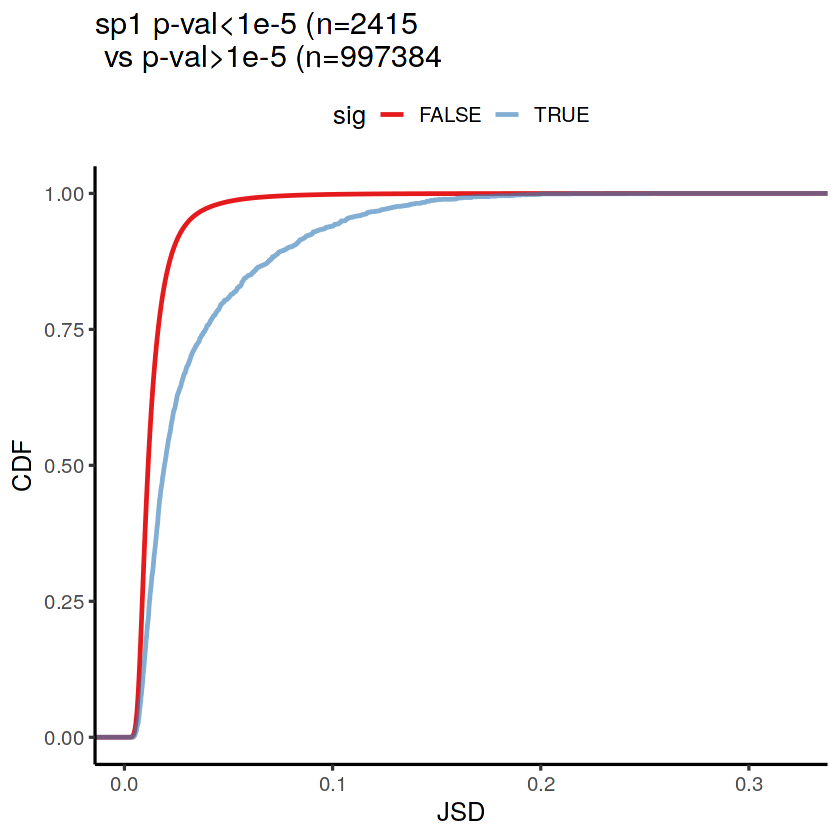

In [15]:
data=new_df
tf="sp1"
data$sig=data$pvalue<1e-5
data$sig=factor(data$sig)
sig_logratio=data$jsd.mean[data$sig==TRUE]
num_sig=length(sig_logratio)
non_sig_logratio=data$jsd.mean[data$sig==FALSE]
num_non_sig=length(non_sig_logratio)

test <- wilcox_test(abs(jsd.mean)~sig,data=data,conf.level=0.99,conf.int=TRUE,paired=TRUE)

p = ggplot(data, aes(abs(jsd.mean), colour=sig)) +
  stat_ecdf(size=1)+
  scale_color_manual(values=c("#e41a1c","#377eb8a0"))+
  xlab("JSD")+
  ylab("CDF")+
  ggtitle(paste(tf, ' p-val<1e-5 (n=',num_sig,' \n vs p-val>1e-5 (n=',num_non_sig,sep=''))+
  theme_classic(15)+
  theme(legend.position="top")
p
ggsave("subfigs_new/bqtls_dnase_significance_test.pdf",p)

In [16]:
test


	Asymptotic Wilcoxon-Mann-Whitney Test

data:  abs(jsd.mean) by sig (FALSE, TRUE)
Z = -38.867, p-value < 2.2e-16
alternative hypothesis: true mu is not equal to 0
99 percent confidence interval:
 -0.007874295 -0.006719188
sample estimates:
difference in location 
          -0.007285817 
